In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib_inline
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopword')
import unicodedata


ImportError: cannot import name 'int' from 'numpy' (c:\Users\sean8\Anaconda3 Software\envs\learn-env\lib\site-packages\numpy\__init__.py)

In [253]:
# Read in the file with the correct encoding
data = pd.read_csv('brandandproductemotions.csv', encoding='latin1')

# Display the first few rows of the data and rename colummns
data.columns = ['tweet', 'brand_og', 'target']

# rename target column values to simpler expressions
emotions = {'Negative emotion': 'negative','Positive emotion':'positive','No emotion toward brand or product':'neutral', 'I cant tell':'unknown'}
data['target'] = data['target'].map(emotions)
emotions = {'neutral':1, 'positive':2, 'negative':0}
data['target'] = data['target'].map(emotions)

# Replace NaN with "unknown" in the 'brand_og' column
data['brand_og'].fillna('unknown', inplace=True)

# make all cells lower
data = data.applymap(lambda s: s.lower() if type(s) == str else s)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet     9092 non-null   object 
 1   brand_og  9093 non-null   object 
 2   target    8937 non-null   float64
dtypes: float64(1), object(2)
memory usage: 213.2+ KB


In [254]:
# key words to search for to ID brand
apple = ['iphone',
         'ipad',
         'itunes',
         'apple']
android = ['google',
           'samsung',
           'android']

# function to create new brand column based on values in tweet
def check_substring(tweet):
    # check if any of the sub strings appear individually
    apple_list = any(substring in tweet for substring in apple)
    android_list = any(substring in tweet for substring in android)

    if apple_list and android_list:
        return "both"
    elif apple_list:
        return "apple"
    elif android_list:
        return "android"
    else:
        return "unkown"


In [255]:
# run function check_substring to create new brand column
data['tweet'] = data['tweet'].fillna("")
data['new_brand'] = data['tweet'].apply(check_substring)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      9093 non-null   object 
 1   brand_og   9093 non-null   object 
 2   target     8937 non-null   float64
 3   new_brand  9093 non-null   object 
dtypes: float64(1), object(3)
memory usage: 284.3+ KB


In [256]:
data['new_brand'].value_counts()

apple      5330
android    2778
unkown      723
both        262
Name: new_brand, dtype: int64

In [257]:
data['brand_og'].value_counts()

unknown                            5802
ipad                                946
apple                               661
ipad or iphone app                  470
google                              430
iphone                              297
other google product or service     293
android app                          81
android                              78
other apple product or service       35
Name: brand_og, dtype: int64

In [ ]:
###### word blob comparison to target. if unkowns decrease create new target column and drop unknowns from data set
###### keep neutral ppositive and negative 0, 1, 2

In [258]:
data_apple = data[~data['new_brand'].isin(['android', 'unknown'])]
data_apple['target'].isna().sum()

105

In [259]:
data_apple = data_apple.dropna(subset=['target'])
data_apple['target'].isna().sum()

0

In [ ]:
####### Drop unnecessary columns like brand_og and old target

In [281]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6210 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      6210 non-null   object 
 1   brand_og   6210 non-null   object 
 2   target     6210 non-null   float64
 3   new_brand  6210 non-null   object 
dtypes: float64(1), object(3)
memory usage: 242.6+ KB


In [261]:
data_apple['new_brand'].value_counts()

apple     5237
unkown     717
both       256
Name: new_brand, dtype: int64

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", str(i))
        hashtags.append(ht)

    return hashtags

# Apply the hashtag_extract function to the 'tweet' column
data_apple['hashtags'] = data_apple['tweet'].apply(hashtag_extract)

# Now, the 'hashtags' column will contain a list of hashtags extracted from each tweet
print(data_apple[['tweet', 'hashtags']])

In [262]:

# DONE - Text Standardization: Convert all the text to a standard format, typically lowercase, to ensure uniformity across the entire dataset.

# DONE - Tokenization: Break the text into individual words or tokens. You can use libraries like NLTK (Natural Language Toolkit) or SpaCy for tokenization.

# DONE of URLs: Since URLs do not provide useful information for NLP tasks, it's recommended to remove them. This can be achieved using regular expressions.

# DONE - Removing @ mentions and Hashtags: The "@" mentions and "#" hashtags can be removed using regular expressions. Alternatively, you may want to replace them with the appropriate words that they are signifying. This can vary based on the specifics of your project.

# DONE - Removing Emoji and Emoticons: These can either skew your model (since they may not be present in your training set) or they could be turned into standardized text. For example, :) can be converted to the word 'smile'. You can use an emoji library for this purpose.

# DONE - Removing Punctuation: Punctuation can be removed using regular expressions or string manipulation functions.

# DONE - Stopwords Removal: Words such as "is", "and", "the", etc., are often removed as they usually do not carry much useful information. Libraries like NLTK and SpaCy have built-in lists of stopwords that can be used.

# DONE - Removing Numbers: Depending on the context, you might want to remove numbers. You can do this using regular expressions.

# DONE - Stemming or Lemmatization: This process involves reducing a word to its root form. For example, "running" is reduced to "run". Stemming can be a crude process, but it's faster. Lemmatization is more accurate but computationally more intensive.

# Handling Negations: Certain negation phrases like "not good", "isn't", "wasn't" etc. should be handled carefully. You may want to treat them as one term ("not_good", "is_not", "was_not") so that the sentiment isn't lost.

# Spell Checking: This is particularly important for tweets as they often contain misspelled words. You can use a library like pyspellchecker for this.

# DONE - Removing Extra Whitespaces: Finally, make sure that there are no additional whitespaces in your text.

# Keep in mind that not all these steps will be necessary for every NLP task, and some may even be counterproductive. For example, in sentiment analysis, removing emojis could potentially remove useful sentiment information. Similarly, if you're doing an authorship attribution task, you might want to keep features like capitalization, as they can be indicative of individual writing styles. Therefore, the steps should be tailored to the specifics of your NLP task.


In [263]:
# Create a function that compiles all the steps taken above
#def preprocess(text):
#    '''
#    Processes text data by basic cleaning, tokenization, lemmatization, and stopwords removal.
#    '''
#    text = text.apply(lambda x: x.lower())
#    text = text.apply(lambda x: re.sub(r'([^A-Za-z0-9|\s|[:punct:]]*)', '', x))
#    text = text.apply(lambda x: x.replace('[^a-zA-Z#]', ' ').replace('quot', '').replace(':', '').replace('sxsw', ''))
#    text = text.apply(lambda x: ' '.join([i for i in x.split() if len(i)>3]))
#    text = text.apply(lambda x: x.split())
#    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#    text = text.apply(lambda x: [word for word in x if word not in stopwords])
#    text = text.apply(lambda x: ' '.join(x))
#    return text

In [264]:
def clean_tweet(text):
    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)
    
    # Handle RT tags
    text = re.sub(r'[Rr][Tt]', '', text)
    
    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
        
    # Remove special characters and numbers not adjacent to text
    text = re.sub(r'\b\d+\b', '', text)

    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces

    # Tokenize the cleaned tweet
    tknzr = TweetTokenizer()
    tokenized_tweet = tknzr.tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokenized_tweet = [word for word in tokenized_tweet if word not in stop_words]

    # Unique words to remove, add more as needed
    words_to_remove = ['Austin', 'Link', 'Sxsw', 'sxsw']

    for word in words_to_remove:
        tokenized_tweet = [w for w in tokenized_tweet if not re.match(r'\b{}\b'.format(word), w, flags=re.IGNORECASE)]

    return tokenized_tweet


In [1]:
data_apple['cleaned_tweet'] = data_apple['tweet'].apply(lambda x: clean_tweet(x))
data_apple['cleaned_tweet'].head(15)

NameError: name 'data_apple' is not defined

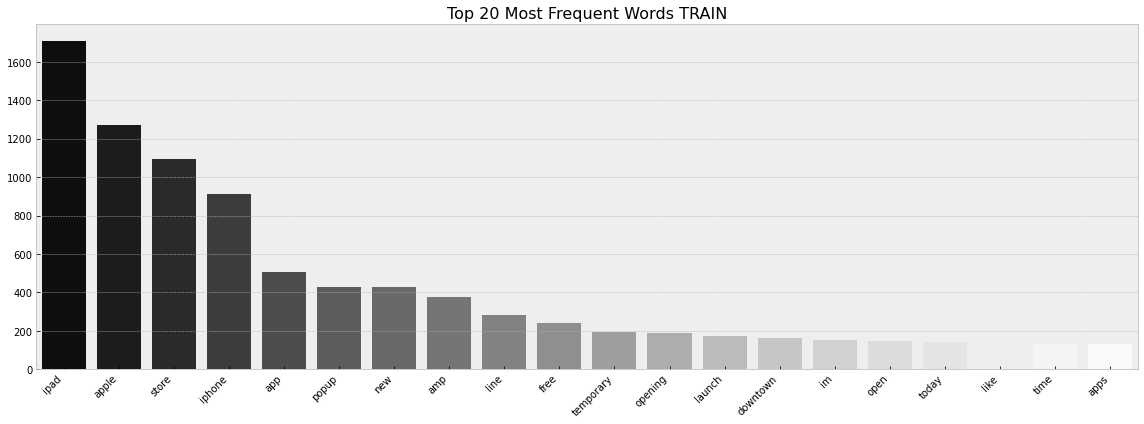

In [273]:
# Convert tokenized tweets back to strings
X_train_pro_str = X_train_pro.apply(lambda tokens: ' '.join(tokens))

# Initialize CountVectorizer with stop_words
cv = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_counts = cv.fit_transform(X_train_pro_str)

# Get the word frequencies
sum_words = X_train_counts.sum(axis=0)

# Create a list of (word, frequency) tuples
frequencies = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

# Sort the frequencies in descending order
frequencies = sorted(frequencies, key=lambda x: x[1], reverse=True)

# Convert the list to a DataFrame
df_frequencies = pd.DataFrame(frequencies, columns=['word', 'frequency'])

# Plot the top 20 most frequent words
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='word', y='frequency', data=df_frequencies.head(20), palette='Greys_r')
ax.set_title('Top 20 Most Frequent Words TRAIN', fontsize=16)
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
X = data_apple['clean_tweet']
y =data_apple['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [ ]:
#### if we want we can rerun countvetorizer graph for train and test we should see some similarities like ipad, apple in both

In [277]:
##### ngram_range do we want to capture only singles and pairs of words???
##### the token_patern is only capturing words and not capturing 3g. do we want to add an expresion 
##### to capture words begining with a number?
##### can we grid search CountVectorizer for ngram_range???


# Convert tokenized tweets back to strings
X_train_pro_str = X_train_pro.apply(lambda tokens: ' '.join(tokens))
X_test_pro_str = X_test_pro.apply(lambda tokens: ' '.join(tokens))

# Create CountVectorizer with the specified token pattern and stop words
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=stop_words, ngram_range=[1, 2])

# Fit and transform the training data
X_train_vec = vec.fit_transform(X_train_pro_str)

# Transform the test data (only transform, don't fit again)
X_test_vec = vec.transform(X_test_pro_str)

In [280]:
new_df = pd.DataFrame(X_train_vec.toarray(), columns=vec.get_feature_names())
new_df.head()

,aa,aaaa,aapl,aaron,abacus,abba,abc,aber,ability,able,...,zite,zlf,zms,zombie,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
